In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

total 4
-rw------- 1 root root 67 May 13 17:35 kaggle.json
{"username":"gosusaisree","key":"e2e379d5fe75b040187e9684200e2d76"}

In [ ]:
!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 81kB 2.9MB/s 
     |████████████████████████████████| 5.3MB 7.9MB/s 
     |████████████████████████████████| 51kB 3.5MB/s 
     |████████████████████████████████| 112kB 45.8MB/s 
     |████████████████████████████████| 112kB 29.6MB/s 


In [ ]:
pip install --upgrade kaggle

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [ ]:
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge           COVID-19 Open Research Dataset Challenge (CORD-19)    2GB  2020-05-02 20:35:01          65274  
roche-data-science-coalition/uncover                        UNCOVER COVID-19 Challenge                          142MB  2020-04-29 22:47:23           8299  
jessemostipak/animal-crossing                               Animal Crossing                                     754KB  2020-05-04 15:30:32            363  
mrmorj/political-advertisements-from-facebook               Political Advertisements from Facebook              237MB  2020-05-05 18:53:51             52  
mrisdal/married-at-first-sight                              Marr

In [ ]:
!kaggle datasets download -d moltean/fruits

 98% 714M/732M [00:04<00:00, 161MB/s]
100% 732M/732M [00:04<00:00, 157MB/s]


In [ ]:
import numpy as np # linear algebra
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import glob
import os
print(os.listdir("/content")[2])

Using TensorFlow backend.


fruits.zip


In [ ]:
!unzip fruits.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360/Training/Tangelo/r_16_100.jpg  
  inflating: fruits-360/Training/Tangelo/r_17_100.jpg  
  inflating: fruits-360/Training/Tangelo/r_181_100.jpg  
  inflating: fruits-360/Training/Tangelo/r_182_100.jpg  
  inflating: fruits-360/Training/Tangelo/r_183_100.jpg  
  inflating: fruits-360/Training/Tangelo/r_184_100.jpg  
  inflating: fruits-360/Training/Tangelo/r_185_100.jpg  
  inflating: fruits-360/Training/Tangelo/r_186_100.jpg  
  inflating: fruits-360/Training/Tangelo/r_187_100.jpg  
  inflating: fruits-360/Training/Tangelo/r_188_100.jpg  
  inflating: fruits-360/Training/Tangelo/r_189_100.jpg  
  inflating: fruits-360/Training/Tangelo/r_18_100.jpg  
  inflating: fruits-360/Training/Tangelo/r_190_100.jpg  
  inflating: fruits-360/Training/Tangelo/r_191_100.jpg  
  inflating: fruits-360/Training/Tangelo/r_192_100.jpg  
  inflating: fruits-360/Training/Tangelo/r_193_100.jpg  
  inflating: fruits-360/Training/Tangelo

In [ ]:
print(os.listdir("/content"))

['.config', 'kaggle.json', 'fruits.zip', 'readme.md', 'fruits-360', 'sample_data']


In [ ]:
img=glob.glob(("/content/fruits-360/Training/*"))
for i in img:
    print(i)

/content/fruits-360/Training/Grape White 3
/content/fruits-360/Training/Cauliflower
/content/fruits-360/Training/Tomato 3
/content/fruits-360/Training/Cherry Wax Red
/content/fruits-360/Training/Onion Red Peeled
/content/fruits-360/Training/Peach
/content/fruits-360/Training/Kohlrabi
/content/fruits-360/Training/Tomato Cherry Red
/content/fruits-360/Training/Orange
/content/fruits-360/Training/Apple Red Yellow 1
/content/fruits-360/Training/Pear
/content/fruits-360/Training/Ginger Root
/content/fruits-360/Training/Potato Sweet
/content/fruits-360/Training/Lemon Meyer
/content/fruits-360/Training/Mango
/content/fruits-360/Training/Pear Forelle
/content/fruits-360/Training/Tomato Maroon
/content/fruits-360/Training/Tomato 1
/content/fruits-360/Training/Granadilla
/content/fruits-360/Training/Pepper Green
/content/fruits-360/Training/Peach 2
/content/fruits-360/Training/Huckleberry
/content/fruits-360/Training/Apple Golden 2
/content/fruits-360/Training/Cherry Wax Black
/content/fruits-36

In [ ]:

from sklearn.datasets import load_files
import numpy as np

train_dir = '/content/fruits-360/Training'
test_dir = '/content/fruits-360/Test'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

x_train, y_train,target_labels = load_dataset(train_dir)
print(x_train)
print(max(y_train))
print(len(y_train))
print(target_labels)
x_test, y_test,_ = load_dataset(test_dir)
print(x_test)
print(y_test)
print(len(y_test))
print('Loading complete!')

print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])

['/content/fruits-360/Training/Pear Kaiser/r_161_100.jpg'
 '/content/fruits-360/Training/Plum 2/r_110_100.jpg'
 '/content/fruits-360/Training/Banana Lady Finger/r_79_100.jpg' ...
 '/content/fruits-360/Training/Pepper Green/78_100.jpg'
 '/content/fruits-360/Training/Pepper Yellow/209_100.jpg'
 '/content/fruits-360/Training/Apple Granny Smith/r_188_100.jpg']
119
60486
['Apple Braeburn' 'Apple Crimson Snow' 'Apple Golden 1' 'Apple Golden 2'
 'Apple Golden 3' 'Apple Granny Smith' 'Apple Pink Lady' 'Apple Red 1'
 'Apple Red 2' 'Apple Red 3' 'Apple Red Delicious' 'Apple Red Yellow 1'
 'Apple Red Yellow 2' 'Apricot' 'Avocado' 'Avocado ripe' 'Banana'
 'Banana Lady Finger' 'Banana Red' 'Beetroot' 'Blueberry' 'Cactus fruit'
 'Cantaloupe 1' 'Cantaloupe 2' 'Carambula' 'Cauliflower' 'Cherry 1'
 'Cherry 2' 'Cherry Rainier' 'Cherry Wax Black' 'Cherry Wax Red'
 'Cherry Wax Yellow' 'Chestnut' 'Clementine' 'Cocos' 'Dates' 'Eggplant'
 'Ginger Root' 'Granadilla' 'Grape Blue' 'Grape Pink' 'Grape White'
 'G

In [ ]:
no_of_classes = len(np.unique(y_train))
no_of_classes

120

In [ ]:
print(y_train[0:10])

[81 95 17 60 13 66 27  1 97 76]


In [ ]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)
y_train[0] # Note that only one element has value 1(corresponding to its label) and others are 0.
#one hot encoding for labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

In [ ]:
from sklearn.model_selection import  train_test_split
X_train,x_val,Y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42)
print(X_train[0])
print(Y_train[0])
print(x_val[0])
print(y_val[0])
print(len(X_train))
print(len(x_val))
#y are labels
#x are images

/content/fruits-360/Training/Cactus fruit/111_100.jpg
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
/content/fruits-360/Training/Apple Red 3/r_171_100.jpg
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
48388
12098


In [ ]:
# We just have the file names in the x set. Let's load the images and convert them into array.
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

X_train = np.array(convert_image_to_array(X_train))
print('Training set shape : ',X_train.shape)

x_val = np.array(convert_image_to_array(x_val))
print('Validation set shape : ',x_val.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',X_train[0].shape)

'''
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import numpy as np
import cv2
default_image_size=tuple((50,50))
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
         # Convert to Numpy Array
        image=cv2.imread(file)
        if image is not None :
          image=cv2.resize(image, default_image_size)
          images_as_array.append(img_to_array(image))
    return images_as_array

X_train = np.array(convert_image_to_array(X_train))
print('Training set shape : ',X_train.shape)

x_val = np.array(convert_image_to_array(x_val))
print('Validation set shape : ',x_val.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',X_train[0].shape)
'''

Training set shape :  (48388, 100, 100, 3)
Validation set shape :  (12098, 100, 100, 3)
Test set shape :  (20618, 100, 100, 3)
1st training image shape  (100, 100, 3)


In [ ]:
print('1st training image as array',X_train[0])

1st training image as array [[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


In [ ]:
# time to re-scale so that all the pixel values lie within 0 to 1
X_train = X_train.astype('float32')/255
x_val = x_val.astype('float32')/255
x_test = x_test.astype('float32')/255
X_train[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

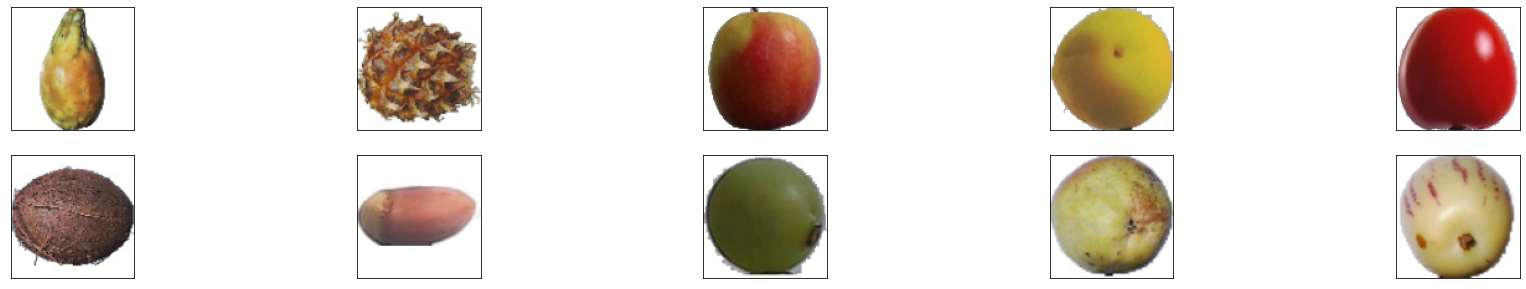

In [ ]:
#Let's visualize the first 10 training images!
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(X_train[i]))
# Yummy fruits ;)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(120,activation = 'softmax'))
model.summary()

'''
Param #
For Dense Layers
output_size * (input_size + 1) == number_parameters

For Convnets
output_channels * (input_channels * window_size + 1) == number_parameters
'''

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 100, 100, 16)      208       
_________________________________________________________________
activation_5 (Activation)    (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 64)       

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [ ]:
batch_size = 32

checkpointer = ModelCheckpoint(filepath ='cnn_from_scratch_fruits.hdf5', verbose = 1, save_best_only = True)

history = model.fit(X_train,Y_train,
        batch_size = 32,
        epochs=30,
        validation_data=(x_val, y_val),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

Train on 48388 samples, validate on 12098 samples
Epoch 1/30
 - 36s - loss: 0.9626 - accuracy: 0.7395 - val_loss: 0.0635 - val_accuracy: 0.9779

Epoch 00001: val_loss improved from inf to 0.06348, saving model to cnn_from_scratch_fruits.hdf5
Epoch 2/30
 - 29s - loss: 0.1121 - accuracy: 0.9630 - val_loss: 0.0229 - val_accuracy: 0.9914

Epoch 00002: val_loss improved from 0.06348 to 0.02287, saving model to cnn_from_scratch_fruits.hdf5
Epoch 3/30
 - 30s - loss: 0.0655 - accuracy: 0.9796 - val_loss: 0.0051 - val_accuracy: 0.9989

Epoch 00003: val_loss improved from 0.02287 to 0.00515, saving model to cnn_from_scratch_fruits.hdf5
Epoch 4/30
 - 29s - loss: 0.0528 - accuracy: 0.9845 - val_loss: 0.0035 - val_accuracy: 0.9989

Epoch 00004: val_loss improved from 0.00515 to 0.00353, saving model to cnn_from_scratch_fruits.hdf5
Epoch 5/30
 - 30s - loss: 0.0441 - accuracy: 0.9877 - val_loss: 0.0038 - val_accuracy: 0.9988

Epoch 00005: val_loss did not improve from 0.00353
Epoch 6/30
 - 29s - loss

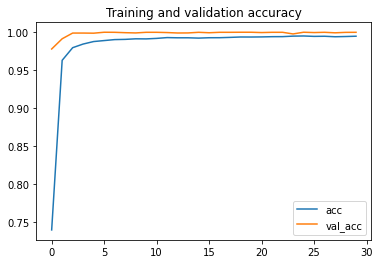

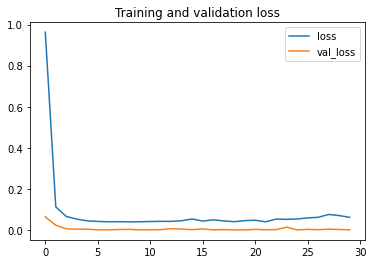

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.title('Training and validation accuracy')


plt.figure()
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.title('Training and validation loss')

plt.show()

In [ ]:
model.load_weights('cnn_from_scratch_fruits.hdf5')

In [ ]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test,batch_size=128,verbose=0)
print('\n', 'Test Loss','Test accuracy:', score[0],score[1])
#98% accuracy !!


 Test Loss Test accuracy: 0.33891535804471984 0.9840430617332458


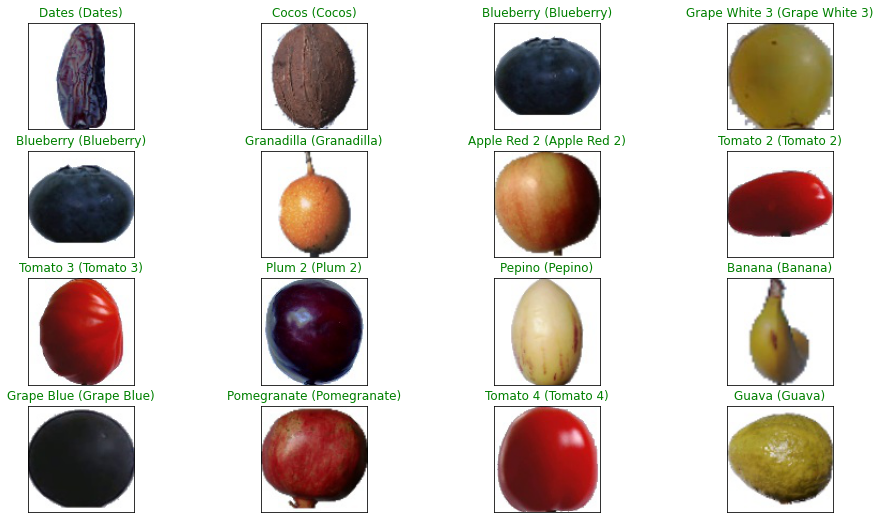

In [ ]:
# Let's visualize test prediction.

y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

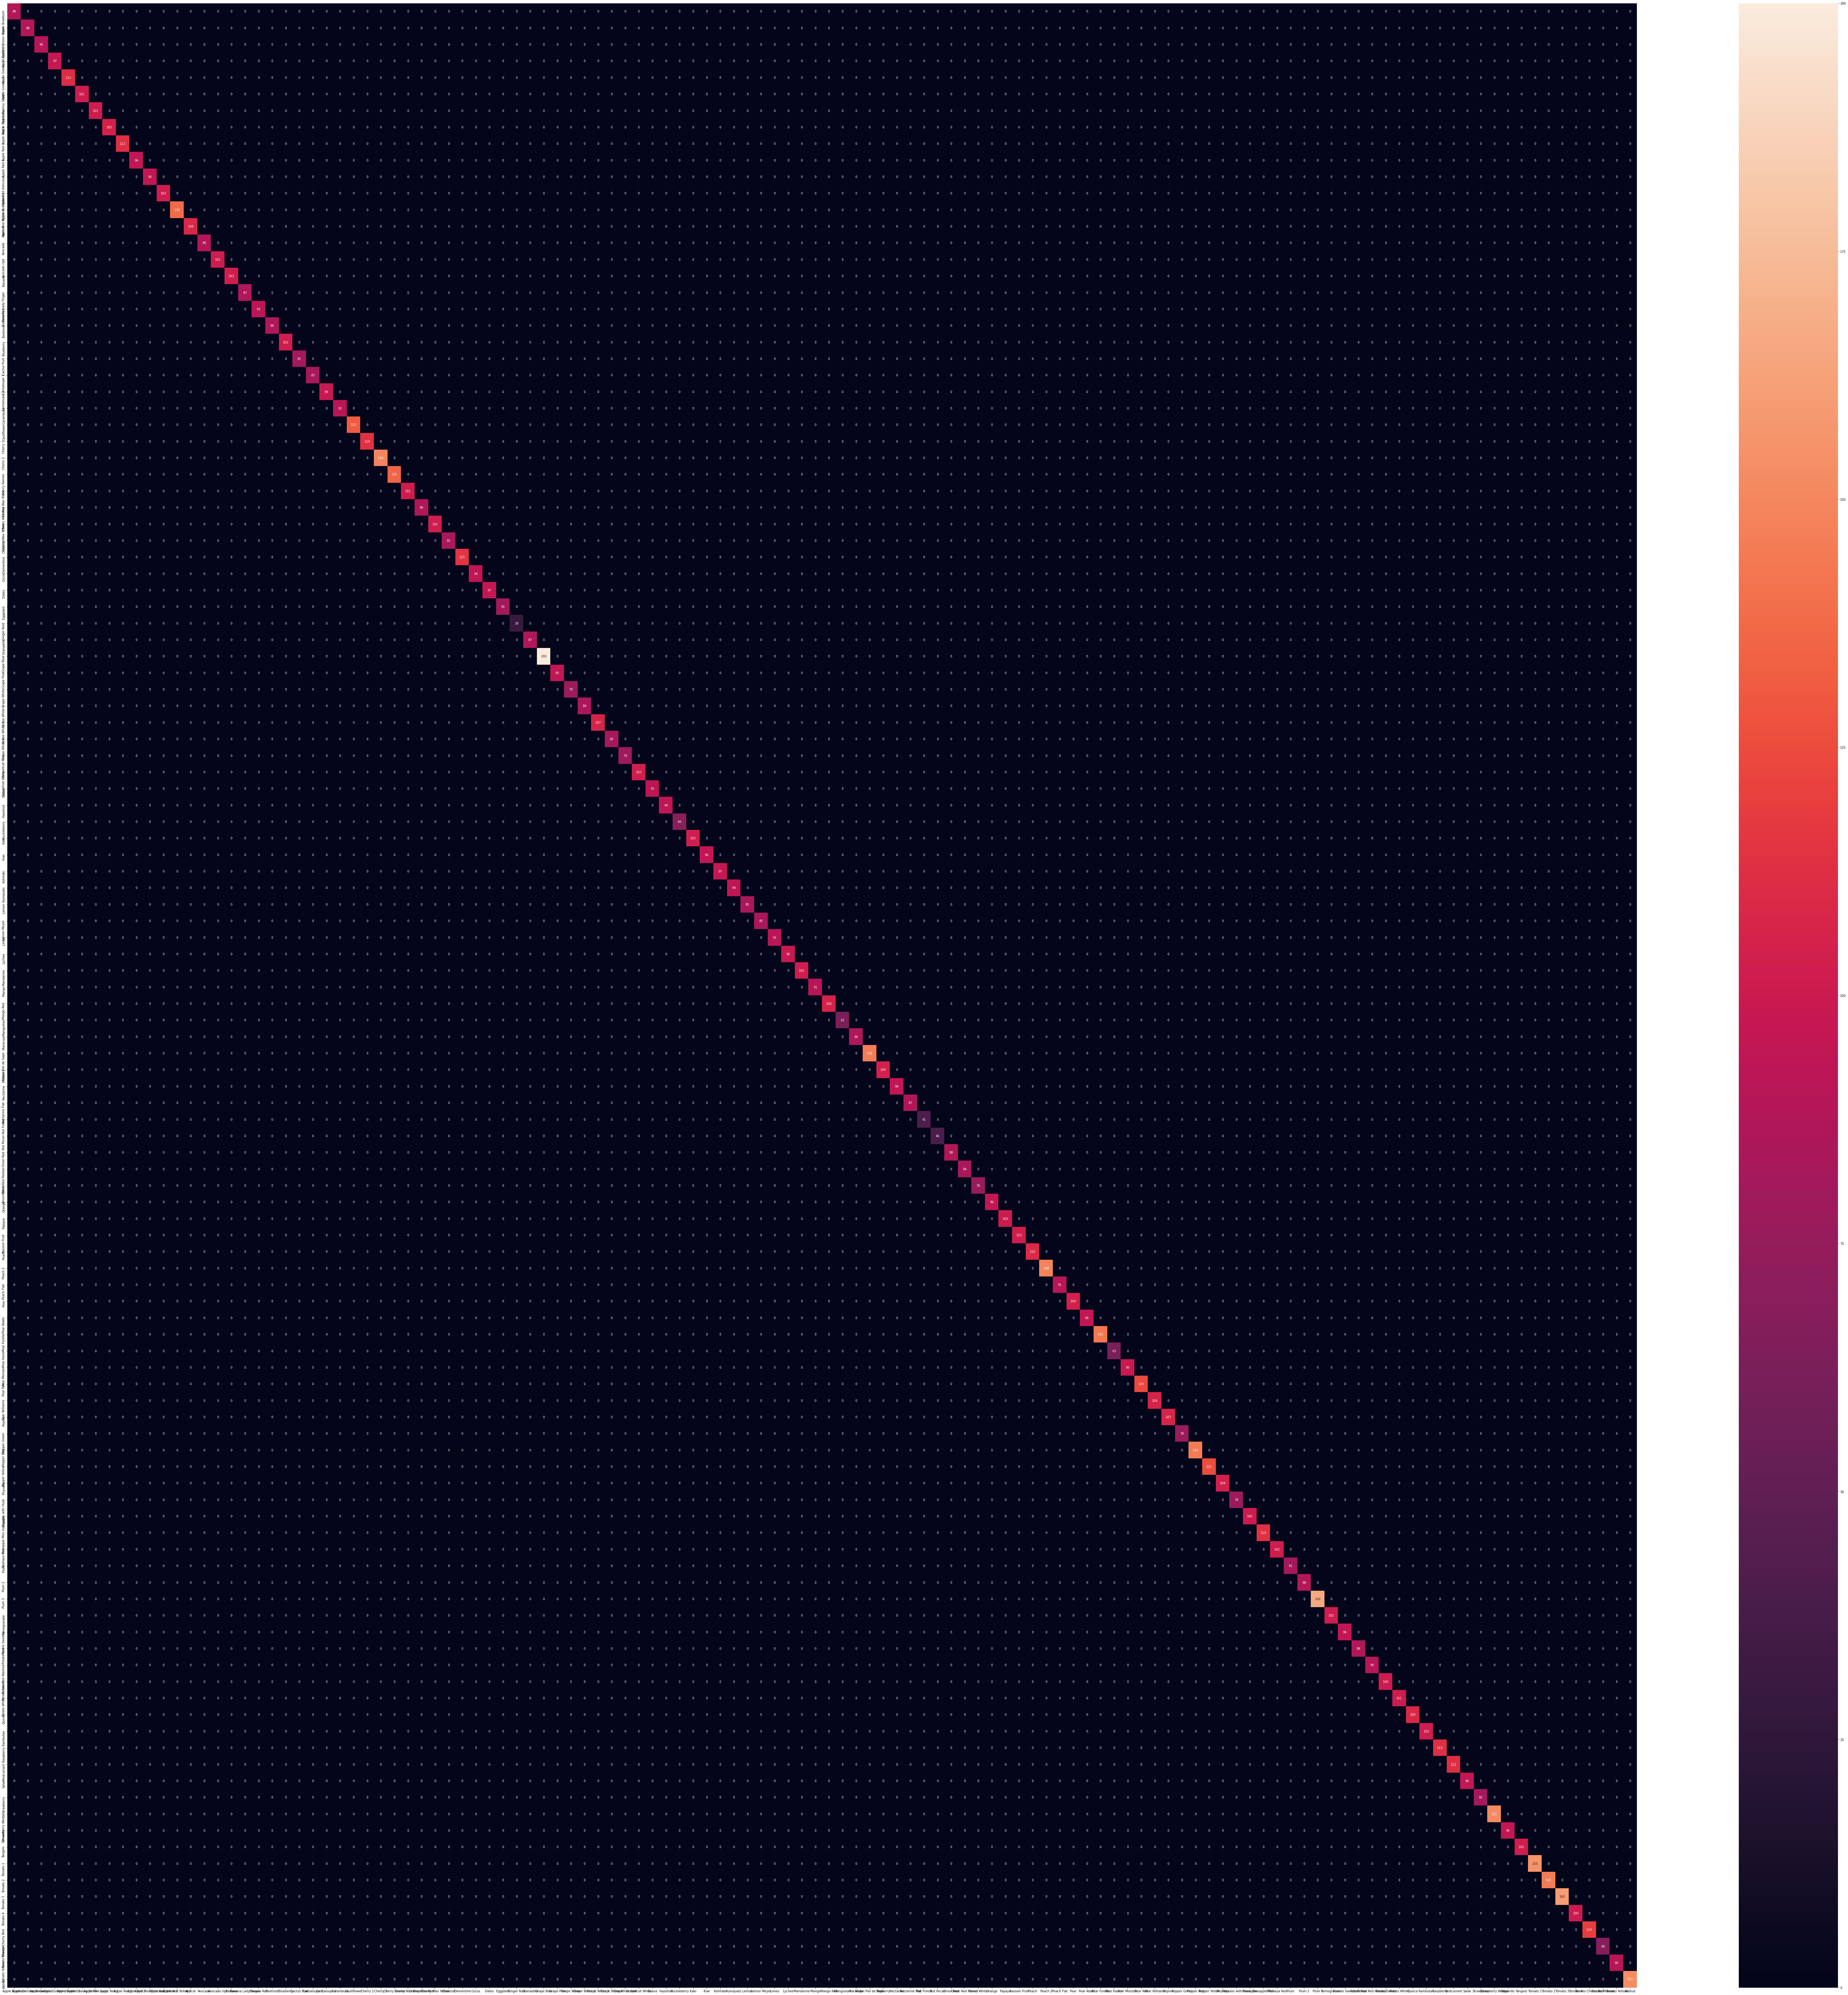

In [ ]:
'''#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
y_pred=model.predict(x_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_val,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
#fruit_names=["Apple","Avocado","Banana","Cherry","Cocos","Kiwi","Lemon","Mango","Orange"]
f,ax=plt.subplots(figsize=(120,120))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(np.unique(target_labels))
ax.set_yticklabels(np.unique(target_labels))
plt.show()'''


In [ ]:
#confusion matrix
y_pred2=model.predict(x_test)
y_pred_classes2=np.argmax(y_pred2,axis=1)
y_true2=np.argmax(y_test,axis=1)
#compute conf mat
conf_mat2=confusion_matrix(y_true2,y_pred_classes2)
#plot the con mat
f,ax=plt.subplots(figsize=(200,200))
sns.heatmap(conf_mat2,annot=True,fmt=".0f")
ax.set_xticklabels(np.unique(target_labels))
ax.set_yticklabels(np.unique(target_labels))
plt.show()